# Color Image Processing

In [87]:
import os
import numpy as np
from PIL import Image
import pandas as pd
from matplotlib import pyplot

In [88]:
os.getcwd()

'/Users/liyutai/GitHub/AI-Project/MMAFEDB/train'

In [89]:
labels = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

In [90]:
os.chdir('/Users/liyutai/GitHub/AI-Project/MMAFEDB/train')

In [91]:
train_path = os.getcwd()

In [92]:
def transfer(label_list):
    dataframe_d = []
    for label in label_list:
        c_path = train_path + "/" + label
#         print(c_path)
        for image_name in os.listdir(c_path):
            if image_name.endswith(".jpg"):
                img_path = c_path + "/" + image_name
                img = Image.open(img_path).convert('L')
#                 img = img.resize(48, 48)
                img_array = np.asarray(img)
                dataframe_d.append([image_name, img_array, label])
                
                
    return(dataframe_d)

In [93]:
test_label = ['angry']
dataframe = transfer(labels)

In [94]:
df = pd.DataFrame(dataframe, columns = ['img_name', "img_array", "label"])
df.head()

,img_name,img_array,label
0,Angry.9677.jpg,"[[33, 35, 35, 30, 27, 30, 39, 46, 33, 42, 61, ...",angry
1,Angry.26462.jpg,"[[103, 103, 95, 73, 50, 37, 36, 38, 41, 61, 72...",angry
2,19187Exp0frightened_programmer_292.jpg,"[[180, 178, 176, 176, 177, 177, 178, 178, 178,...",angry
3,5035Exp0awe_teacher_414.jpg,"[[77, 71, 69, 74, 77, 72, 63, 56, 53, 55, 60, ...",angry
4,18407Exp0frightened_by_the_movie_woman_2.jpg,"[[29, 31, 72, 50, 46, 37, 66, 100, 107, 199, 1...",angry


In [99]:
df["label"].value_counts()

neutral     29384
happy       28592
sad         12223
surprise     8113
angry        6566
fear         4859
disgust      3231
Name: label, dtype: int64

In [95]:
test_ary = df["img_array"][1]
pilImage = Image.fromarray(test_ary)
print(pilImage)

<PIL.Image.Image image mode=L size=48x48 at 0x7FE2BC9693A0>


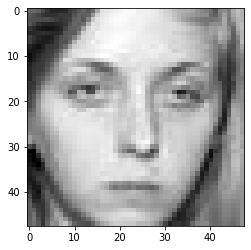

In [96]:
ax = pyplot.subplot()
ax.imshow(test_ary, cmap='gray')

In [108]:
os.chdir("/Users/liyutai/GitHub/AI-Project")
df.to_csv("color.csv", index=False)